In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:

df = pd.read_csv('data_preprocessed_with_all_sectors.csv')
prices = df['Price'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)



In [11]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Function to create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Create data sequences
window_size = 10  # Number of past days you want to use to predict the future
X, y = create_sequences(scaled_prices, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for CNN

In [12]:
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 64)             256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                12850     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [13]:
# Setup callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=1)


Epoch 1/50
13/13 [==============================] - 0s 7ms/step - loss: 0.0093 - val_loss: 0.0010
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0010
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0012
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 0.0011
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0010
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0011
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss: 0.0011
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0010
Epoch 11/50
13/13 [

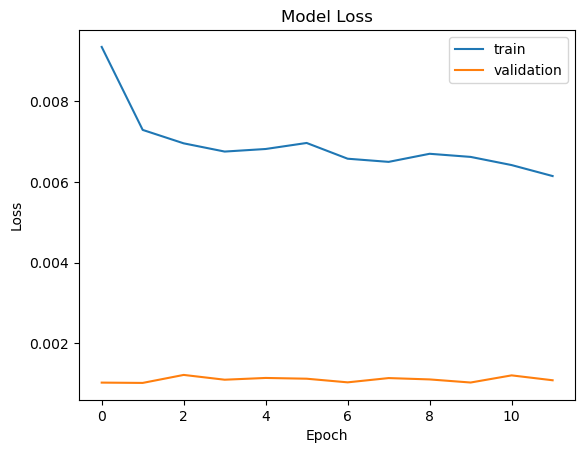

In [14]:
# Plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

16/16 [==============================] - 0s 391us/step


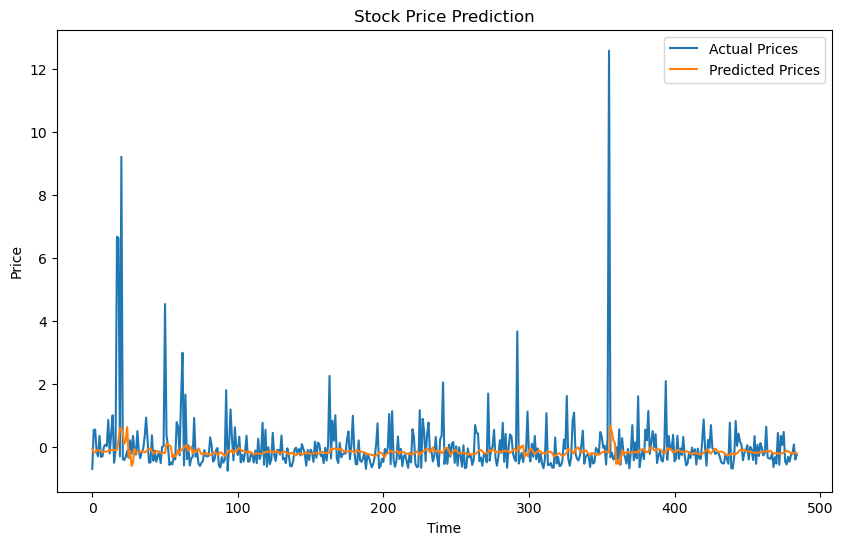

In [15]:
# Making predictions
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(prices[window_size:], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
